In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df= pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#This is used to drop the head of the dataset
df=df.drop(columns=['Id'])

In [10]:
# To display the stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
#This is to display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# To display no of samples of each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [14]:
#Check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Histograms

<AxesSubplot:>

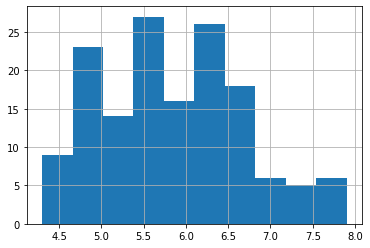

In [15]:
#All are histograms below-
df['SepalLengthCm'].hist()

<AxesSubplot:>

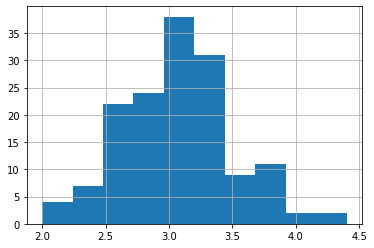

In [16]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

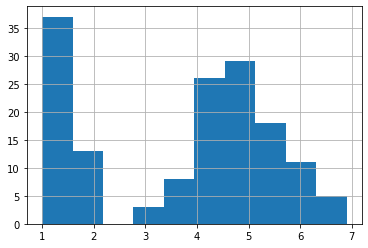

In [17]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

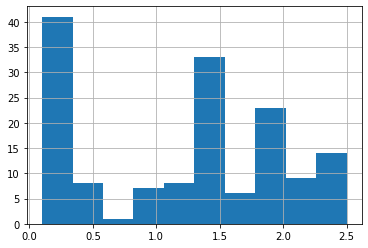

In [18]:
df['PetalWidthCm'].hist()

<AxesSubplot:>

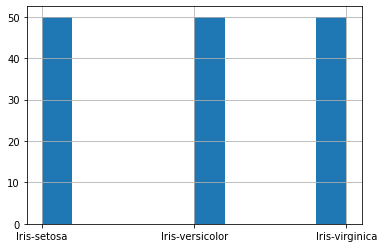

In [19]:
df['Species'].hist()

In [20]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Exploratory Data Analysis

In [ ]:
# scatter plot
colors = ['red','orange','blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

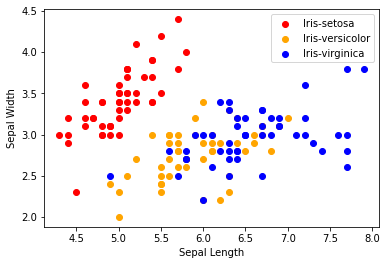

In [31]:
for i in range(3):
    x = df[ df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

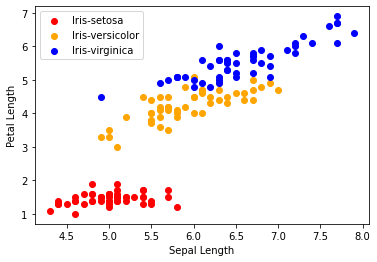

In [29]:
for i in range(3):
    x = df[ df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

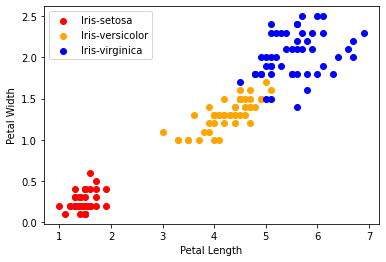

In [30]:
for i in range(3):
    x = df[ df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i], label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

# Corelation Matrix

In [32]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

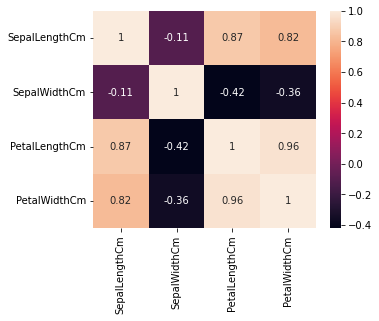

In [33]:
# We can show the correlation using a heat map
# So if we have high correlation between two variable, we can eradicate one of the variables. 

corr= df.corr()
fig, ax= plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)


# Label Encoder

In [34]:
#Label Encoder is used so that the output can be in the numerical form. Not with the names. 


In [35]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


In [36]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
from sklearn.model_selection import train_test_split
#train-70
#test-30
X=df.drop(columns=['Species'])
Y=df['Species']
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.30)

In [44]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [45]:
#model training
model.fit(x_train, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [46]:
#print metric to get performance
print("Accuracy: ", model.score(x_test,y_test)*100)


Accuracy:  97.77777777777777


In [48]:
#knn- k nearest neighbours

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()


In [49]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [51]:
print("Accuracy :", model.score(x_test, y_test)*100)

Accuracy : 95.55555555555556


In [52]:
# decision tree

from sklearn.tree import DecisionTreeClassifier


In [54]:
model = DecisionTreeClassifier()

In [55]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  88.88888888888889
